# Value at Risk

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

In [3]:
# for short time horizons er will be small, and therefore VaR estimations
# will not be much influenced by it
from scipy.stats import norm
CL = 0.95
TRADING_DAYS = 252
portfolio_val = 760000
volatility = 0.307
t = 21
cutoff = norm.ppf(CL)
VaR = portfolio_val * volatility * np.sqrt(t/TRADING_DAYS) * cutoff
print("At {:.2f} confidence level, loss will not exceed {:,.2f}".format(CL, VaR))
print("This represents a move of {:.2f} standard deviations below the expected return".format(cutoff))

At 0.95 confidence level, loss will not exceed 110,786.95
This represents a move of 1.64 standard deviations below the expected return


In [4]:
aapl = 5000
aapl_price = pdr.get_quote_yahoo('AAPL')['price']
aapl_value = aapl * aapl_price
aapl_value = aapl_value.at['AAPL']
t = 21/252
er = .19
volatility = .307
iterations = 50000

In [5]:
aapl_price

AAPL    156.69
Name: price, dtype: float64

In [6]:
def VaR(pv, er, vol, T, iterations):
    end = pv * np.exp((er - .5 * vol ** 2) * T + 
                     vol * np.sqrt(T) * np.random.standard_normal(iterations))
    ending_values = end - pv
    return ending_values

In [7]:
at_risk = VaR(aapl_value,er,volatility, t, iterations)

(array([6.000e+00, 5.000e+00, 1.700e+01, 3.300e+01, 7.400e+01, 1.130e+02,
        2.260e+02, 3.250e+02, 4.980e+02, 7.260e+02, 9.650e+02, 1.339e+03,
        1.708e+03, 2.062e+03, 2.385e+03, 2.657e+03, 2.986e+03, 3.198e+03,
        3.483e+03, 3.322e+03, 3.189e+03, 3.110e+03, 2.924e+03, 2.713e+03,
        2.281e+03, 1.917e+03, 1.696e+03, 1.336e+03, 1.137e+03, 9.560e+02,
        6.960e+02, 5.430e+02, 3.940e+02, 2.980e+02, 2.050e+02, 1.570e+02,
        9.300e+01, 5.900e+01, 5.900e+01, 3.400e+01, 2.700e+01, 1.500e+01,
        1.100e+01, 1.100e+01, 2.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00]),
 array([-223241.17353999, -211424.73508898, -199608.29663796,
        -187791.85818694, -175975.41973592, -164158.9812849 ,
        -152342.54283388, -140526.10438286, -128709.66593184,
        -116893.22748082, -105076.7890298 ,  -93260.35057878,
         -81443.91212776,  -69627.47367674,  -57811.03522572,
         -45994.5967747 ,  -34178.15832368,  -22361.71987266,
    

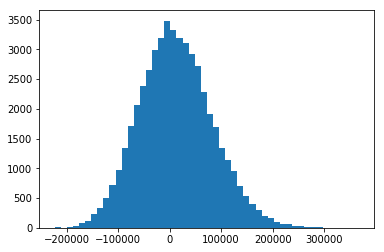

In [8]:
plt.hist(at_risk,bins=50)

In [9]:
percentiles = [1,5,10]
np.percentile(at_risk, percentiles)

array([-139474.40149826,  -98818.14106492,  -76532.66788936])

In [10]:
aapl_price * 5000

AAPL    783450.0
Name: price, dtype: float64